In [1]:
rm(list=ls())
setwd("/hpc/group/pbenfeylab/CheWei/")

In [2]:
# Load libraries
suppressMessages(library(Seurat))
suppressMessages(library(scales))
suppressMessages(library(data.table))
suppressMessages(library(tidyverse))
suppressMessages(library(ggplot2))
suppressMessages(library(grid))
suppressMessages(library(SeuratDisk))

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”


In [3]:
sessionInfo() ## DCC New env

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Stream 8

Matrix products: default
BLAS/LAPACK: /hpc/group/pbenfeylab/ch416/miniconda3/envs/seu4/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=C.UTF-8           LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] SeuratDisk_0.0.0.9020 forcats_0.5.2         stringr_1.5.0        
 [4] dplyr_1.1.1           purrr_1.0.1           readr_2.1.3          
 [7] tidyr_1.3.0           tibble_3.2.1          ggplot2_3.4.2        
[10] tidyverse_1.3.2       data.table_1.14.8     scales_1.2.1      

## Load unseen WT integrated objects

In [ ]:
## Load unseen WT scRNA-seq data (from Seurat Objects downloaded from GEO GSE152766)
seu <- readRDS("./scRNA-seq/Integrated_Objects/Unseen_WTs.rds")

In [11]:
table(seu$orig.ident)


sc_20 sc_21 
12591  9658 

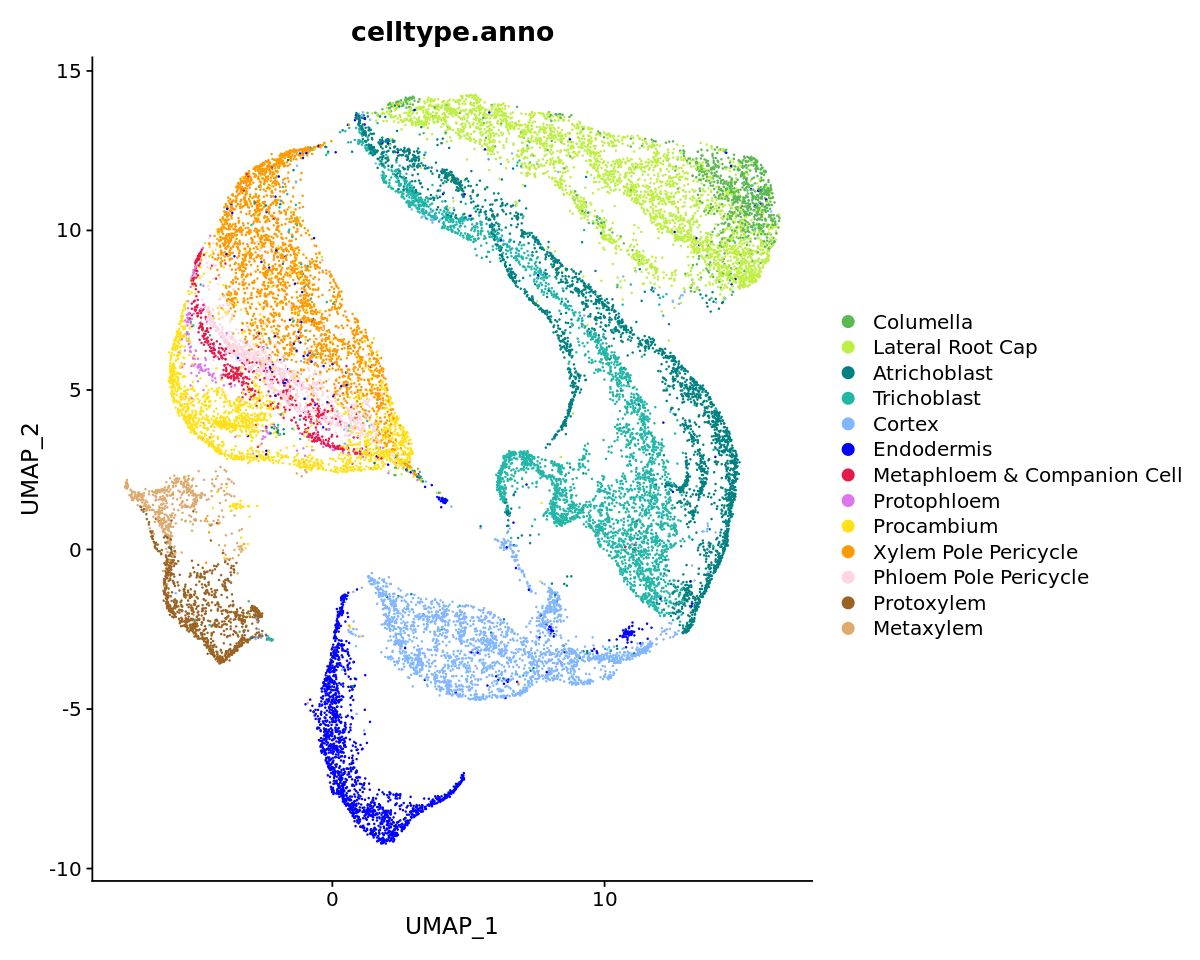

In [12]:
order <- c("Quiescent Center", "Ground Tissue","Columella", "Lateral Root Cap", "Atrichoblast", "Trichoblast", "Cortex", "Endodermis", "Metaphloem & Companion Cell","Protophloem", "Xylem", "Procambium","Xylem Pole Pericycle","Phloem Pole Pericycle", "Protoxylem", "Metaxylem", "Unknown")
palette <- c("#9400d3", "#DCD0FF","#5ab953", "#bfef45", "#008080", "#21B6A8", "#82b6ff", "#0000FF","#e6194b", "#dd77ec", "#9a6324", "#ffe119", "#ff9900", "#ffd4e3", "#9a6324", "#ddaa6f", "#EEEEEE")
seu$celltype.anno <- factor(seu$celltype.anno, levels = order[sort(match(unique(seu$celltype.anno),order))]) 
color <- palette[sort(match(unique(seu$celltype.anno),order))]
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(seu, reduction = "umap", group.by = "celltype.anno", cols = color)+ggtitle("celltype.anno")

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



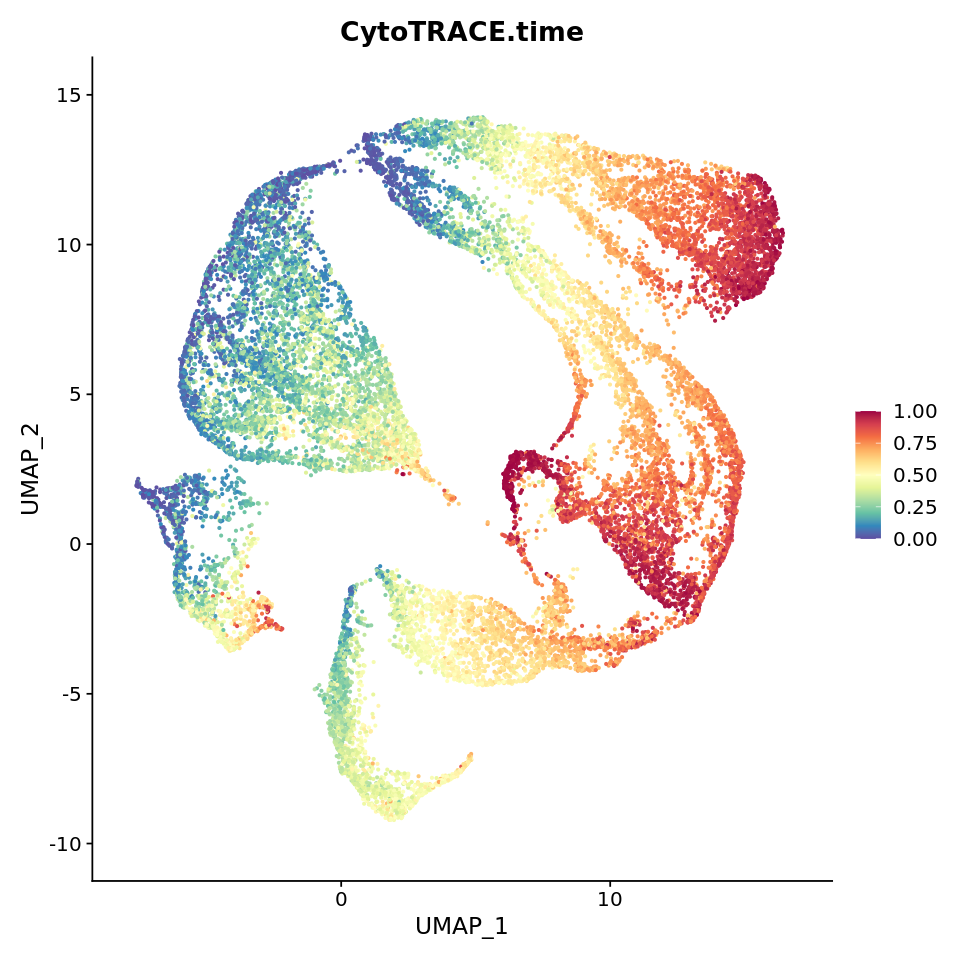

In [14]:
suppressMessages(library(RColorBrewer))
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu, features = "CytoTRACE.time", pt.size=0.5)+ scale_colour_gradientn(colours = rev(brewer.pal(11,"Spectral")))

In [15]:
meta.data <-  seu@meta.data[,c("orig.ident","time.celltype.anno.Li.crude","time.celltype.anno.Li","time.celltype.anno","time.celltype.anno.crude","celltype.anno.crude","celltype.anno", "time.anno", "consensus.time.group", "CytoTRACE.time")]
meta.data$celltype.anno.crude <- as.character(meta.data$celltype.anno.crude)
meta.data$celltype.anno <- as.character(meta.data$celltype.anno)
meta.data$time.anno <- as.character(meta.data$time.anno)
seu@meta.data <- meta.data
DefaultAssay(seu) <- "integrated"
SaveH5Seurat(seu, filename = paste0("rswt","_integrated.h5Seurat"), overwrite=TRUE)
Convert(paste0("rswt","_integrated.h5Seurat"), dest = "h5ad", overwrite=TRUE)
system(paste0("rm ./","rswt","_integrated.h5Seurat"))

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding counts for SCT

Adding data for SCT

Adding scale.data for SCT

No variable features found for SCT

No feature-level metadata found for SCT

Adding data for integrated

Adding scale.data for integrated

Adding variable features for integrated

No feature-level metadata found for integrated

Adding cell embeddings for pca

Adding loadings for pca

No projected loadings for pca

Adding standard deviations for pca

No JackStraw data for pca

Adding cell embeddings for umap

No loadings for umap

No projected loadings for umap

No standard deviations for umap

No JackStraw data for umap

Adding cell embeddings for umap_3D

No loadings for umap_3D

No projected loadings for umap_3D

No standard deviations for umap_3D

No JackStraw data for umap_3D

Adding cell embeddings for umap_2D

No loadings for umap_2D

No project

## Load scr mutant integrated object

In [32]:
seu <- readRDS("./scr_int.rds")

In [33]:
table(seu$orig.ident)


sc_25 sc_36 
 7736  6006 

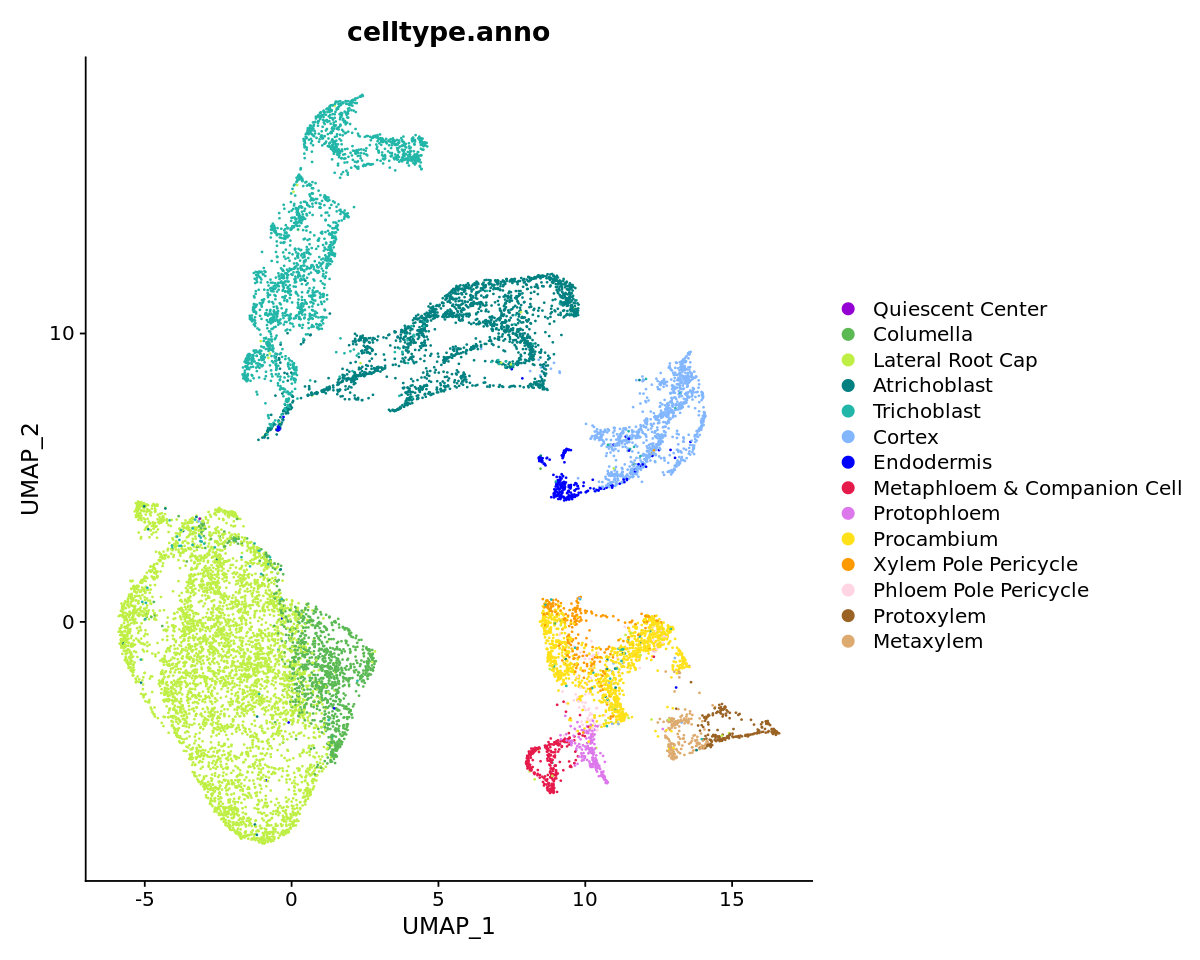

In [34]:
order <- c("Quiescent Center", "Ground Tissue","Columella", "Lateral Root Cap", "Atrichoblast", "Trichoblast", "Cortex", "Endodermis", "Metaphloem & Companion Cell","Protophloem", "Xylem", "Procambium","Xylem Pole Pericycle","Phloem Pole Pericycle", "Protoxylem", "Metaxylem", "Unknown")
palette <- c("#9400d3", "#DCD0FF","#5ab953", "#bfef45", "#008080", "#21B6A8", "#82b6ff", "#0000FF","#e6194b", "#dd77ec", "#9a6324", "#ffe119", "#ff9900", "#ffd4e3", "#9a6324", "#ddaa6f", "#EEEEEE")
seu$celltype.anno <- factor(seu$celltype.anno, levels = order[sort(match(unique(seu$celltype.anno),order))]) 
color <- palette[sort(match(unique(seu$celltype.anno),order))]
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(seu, reduction = "umap", group.by = "celltype.anno", cols = color)+ggtitle("celltype.anno")

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



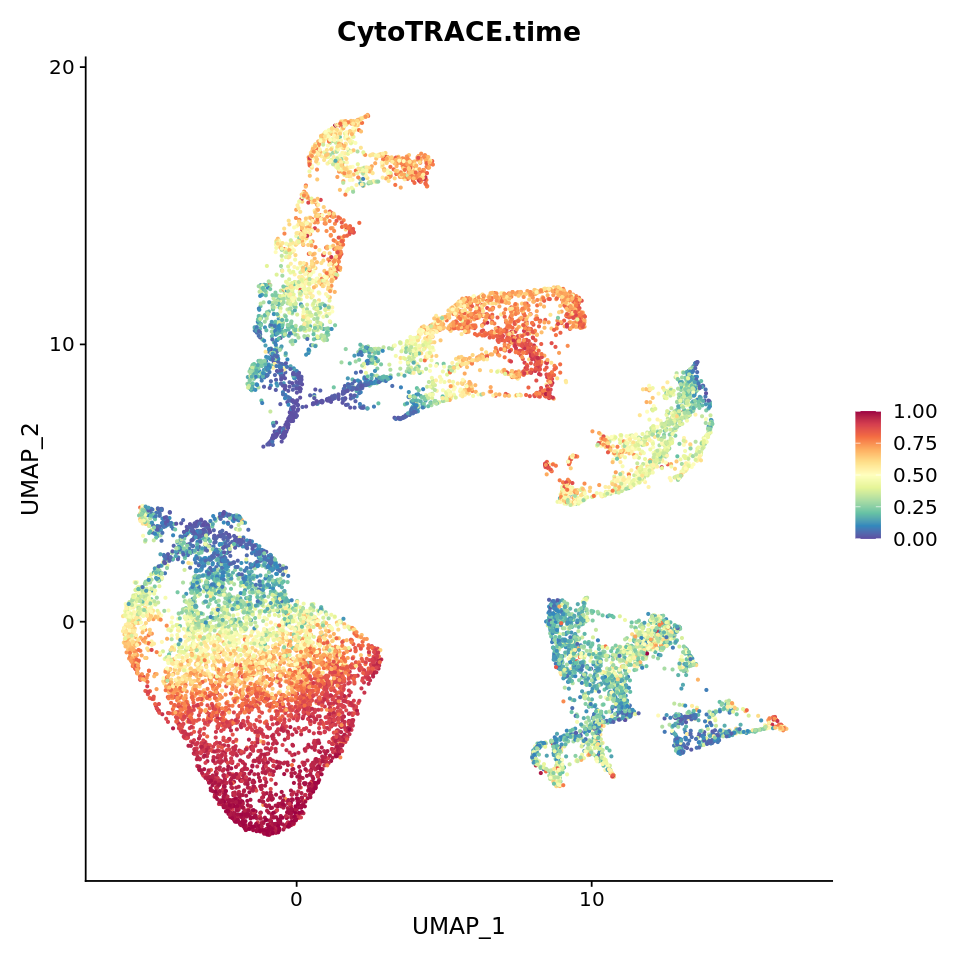

In [35]:
suppressMessages(library(RColorBrewer))
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu, features = "CytoTRACE.time", pt.size=0.5)+ scale_colour_gradientn(colours = rev(brewer.pal(11,"Spectral")))

In [36]:
meta.data <-  seu@meta.data[,c("orig.ident","time.celltype.anno.Li.crude","time.celltype.anno.Li","time.celltype.anno","time.celltype.anno.crude","celltype.anno.crude","celltype.anno", "time.anno", "consensus.time.group", "CytoTRACE.time")]
meta.data$celltype.anno.crude <- as.character(meta.data$celltype.anno.crude)
meta.data$celltype.anno <- as.character(meta.data$celltype.anno)
meta.data$time.anno <- as.character(meta.data$time.anno)
seu@meta.data <- meta.data
DefaultAssay(seu) <- "integrated"
SaveH5Seurat(seu, filename = paste0("scr","_integrated.h5Seurat"), overwrite=TRUE)
Convert(paste0("scr","_integrated.h5Seurat"), dest = "h5ad", overwrite=TRUE)
system(paste0("rm ./","scr","_integrated.h5Seurat"))

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding counts for spliced_RNA

Adding data for spliced_RNA

No variable features found for spliced_RNA

No feature-level metadata found for spliced_RNA

Adding counts for unspliced_RNA

Adding data for unspliced_RNA

No variable features found for unspliced_RNA

No feature-level metadata found for unspliced_RNA

Adding counts for SCT

Adding data for SCT

Adding scale.data for SCT

No variable features found for SCT

No feature-level metadata found for SCT

Adding counts for spliced_SCT

Adding data for spliced_SCT

Adding scale.data for spliced_SCT

No variable features found for spliced_SCT

No feature-level metadata found for spliced_SCT

Adding counts for unspliced_SCT

Adding data for unspliced_SCT

Adding scale.data for unspliced_SCT

No variable features found for unspliced_SCT

No feature-level metadata found for

In [27]:
seu <- readRDS("./shr_int.rds")

In [28]:
table(seu$orig.ident)


sc_52 sc_53 
 6241  8371 

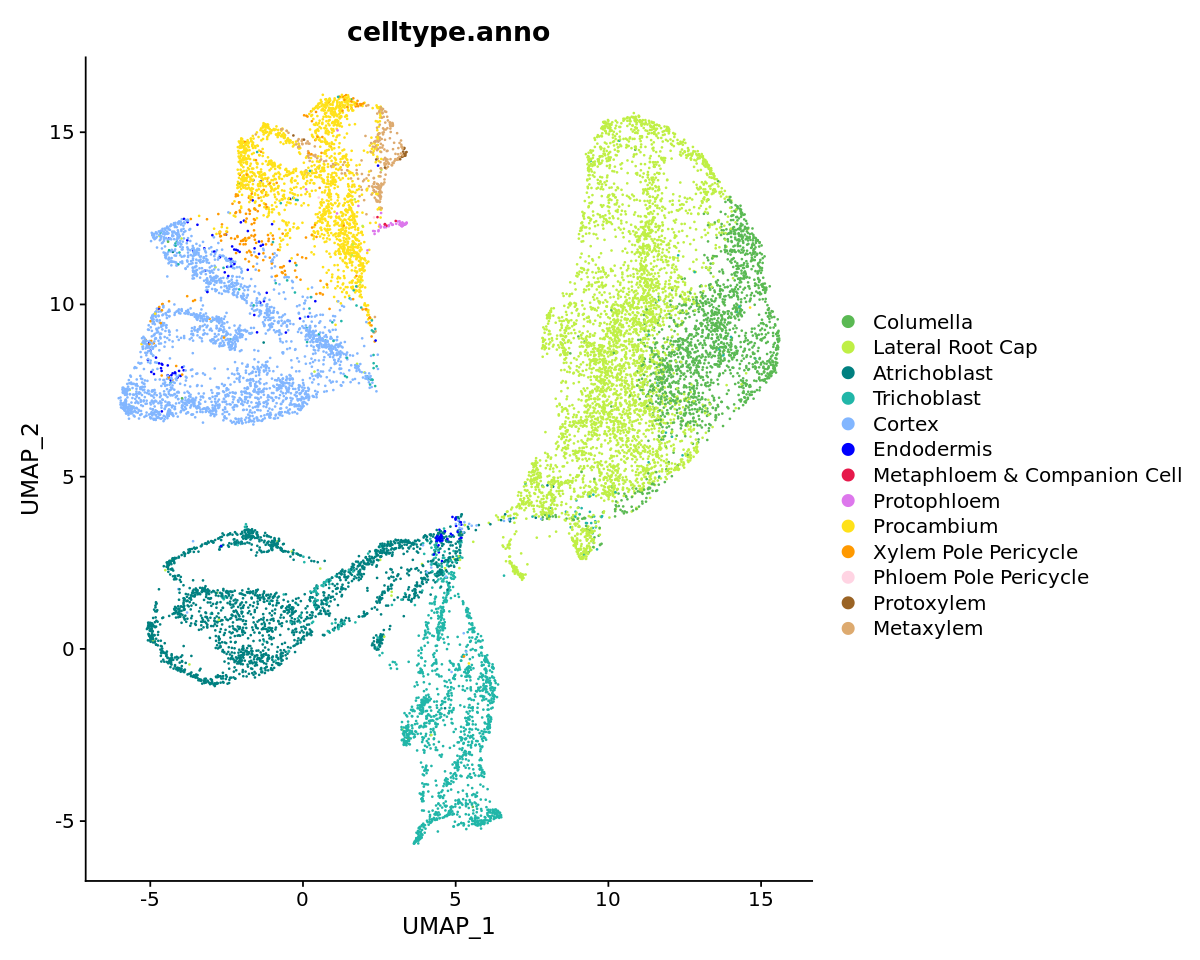

In [29]:
order <- c("Quiescent Center", "Ground Tissue","Columella", "Lateral Root Cap", "Atrichoblast", "Trichoblast", "Cortex", "Endodermis", "Metaphloem & Companion Cell","Protophloem", "Xylem", "Procambium","Xylem Pole Pericycle","Phloem Pole Pericycle", "Protoxylem", "Metaxylem", "Unknown")
palette <- c("#9400d3", "#DCD0FF","#5ab953", "#bfef45", "#008080", "#21B6A8", "#82b6ff", "#0000FF","#e6194b", "#dd77ec", "#9a6324", "#ffe119", "#ff9900", "#ffd4e3", "#9a6324", "#ddaa6f", "#EEEEEE")
seu$celltype.anno <- factor(seu$celltype.anno, levels = order[sort(match(unique(seu$celltype.anno),order))]) 
color <- palette[sort(match(unique(seu$celltype.anno),order))]
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(seu, reduction = "umap", group.by = "celltype.anno", cols = color)+ggtitle("celltype.anno")

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



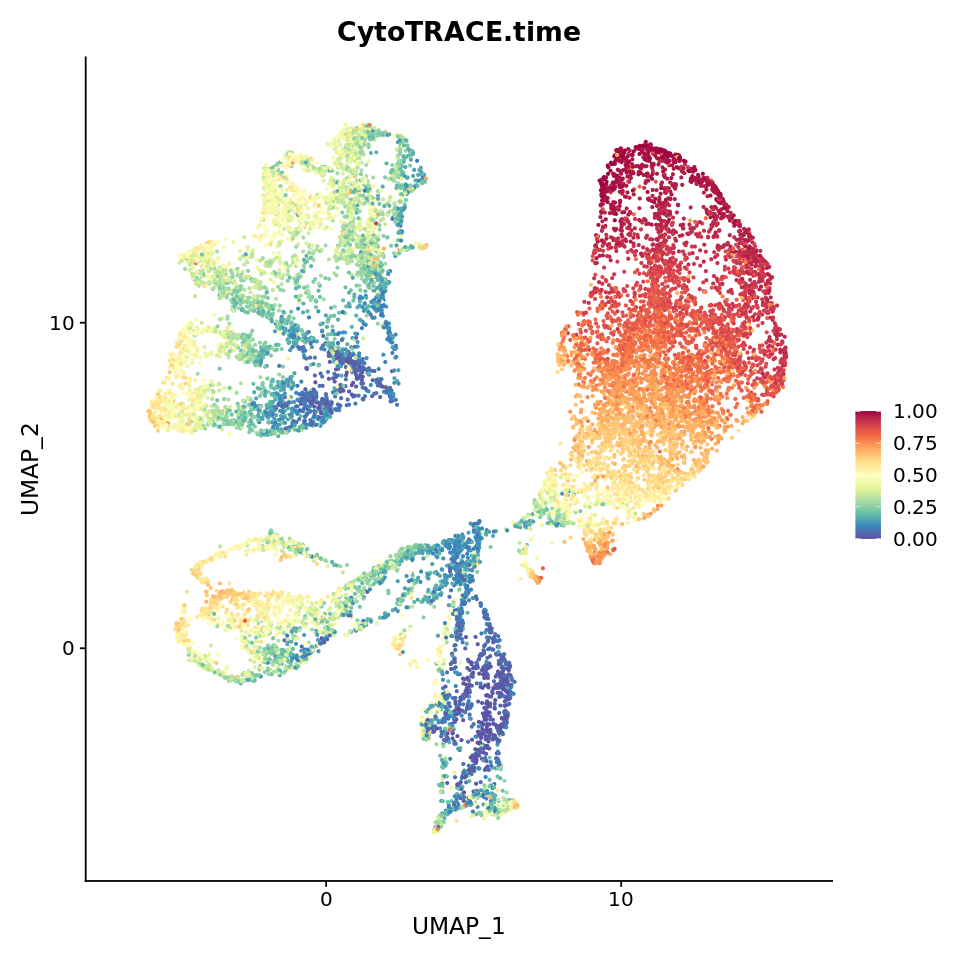

In [30]:
suppressMessages(library(RColorBrewer))
options(repr.plot.width=8, repr.plot.height=8)
FeaturePlot(seu, features = "CytoTRACE.time", pt.size=0.5)+ scale_colour_gradientn(colours = rev(brewer.pal(11,"Spectral")))

In [31]:
meta.data <-  seu@meta.data[,c("orig.ident","time.celltype.anno.Li.crude","time.celltype.anno.Li","time.celltype.anno","time.celltype.anno.crude","celltype.anno.crude","celltype.anno", "time.anno", "consensus.time.group", "CytoTRACE.time")]
meta.data$celltype.anno.crude <- as.character(meta.data$celltype.anno.crude)
meta.data$celltype.anno <- as.character(meta.data$celltype.anno)
meta.data$time.anno <- as.character(meta.data$time.anno)
seu@meta.data <- meta.data
DefaultAssay(seu) <- "integrated"
SaveH5Seurat(seu, filename = paste0("shr","_integrated.h5Seurat"), overwrite=TRUE)
Convert(paste0("shr","_integrated.h5Seurat"), dest = "h5ad", overwrite=TRUE)
system(paste0("rm ./","shr","_integrated.h5Seurat"))

Creating h5Seurat file for version 3.1.5.9900

Adding counts for RNA

Adding data for RNA

No variable features found for RNA

No feature-level metadata found for RNA

Adding counts for spliced_RNA

Adding data for spliced_RNA

No variable features found for spliced_RNA

No feature-level metadata found for spliced_RNA

Adding counts for unspliced_RNA

Adding data for unspliced_RNA

No variable features found for unspliced_RNA

No feature-level metadata found for unspliced_RNA

Adding counts for SCT

Adding data for SCT

Adding scale.data for SCT

No variable features found for SCT

No feature-level metadata found for SCT

Adding counts for spliced_SCT

Adding data for spliced_SCT

Adding scale.data for spliced_SCT

No variable features found for spliced_SCT

No feature-level metadata found for spliced_SCT

Adding counts for unspliced_SCT

Adding data for unspliced_SCT

Adding scale.data for unspliced_SCT

No variable features found for unspliced_SCT

No feature-level metadata found for